In [6]:
# Library Imports

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from IPython import display
import requests
import io

In [60]:
# Part1 Better gradient descent for optimization (40 points):

# 더 좋은 2D graient_descent를 만들거임.

def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True):
    # Your code here
    """
    Gradient Descent Algorithm for Optimization
    
    Parameters:
    - gradient: Function to compute the gradient
    - X: Input data
    - Y: Output data
    - initial: Initial values for parameters
    - learning_rate: Learning rate for the update step
    - max_iter: Maximum number of iterations
    - stop_tolerance: Tolerance for stopping criterion
    - online_loss_plot: If True, plot the loss after each iteration
    
    Returns:
    - theta: Optimized parameters
    """
    
    theta = initial
    iteration = 0
    losses = []
    
    while iteration < max_iter:
        grad = gradient(X, Y, theta)
        theta = theta - learning_rate * grad
        
        # Compute the loss (mean squared error for linear regression)
        loss = ((X @ theta - Y) ** 2).mean()
        losses.append(loss)
        
        # Print the loss at each iteration
        print(f"Iteration {iteration}: Loss = {loss:.4f}")
        
        # If the change in loss is below the tolerance, stop
        if iteration > 0 and abs(losses[-1] - losses[-2]) < stop_tolerance:
            print(f"Stopping criterion reached: Change in loss below {stop_tolerance}")
            break
        
        iteration += 1
        
        # Optionally plot the loss
        if online_loss_plot:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 5))
            plt.plot(losses)
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.title('Loss over iterations')
            plt.show()
    
    return theta

(2939, 22)
Iteration 0: Loss = 6156.2801
Iteration 1: Loss = 6144.0093
Iteration 2: Loss = 6131.7630
Iteration 3: Loss = 6119.5412
Iteration 4: Loss = 6107.3438
Iteration 5: Loss = 6095.1708
Iteration 6: Loss = 6083.0221
Iteration 7: Loss = 6070.8977
Iteration 8: Loss = 6058.7975
Iteration 9: Loss = 6046.7216
Iteration 10: Loss = 6034.6697
Iteration 11: Loss = 6022.6420
Iteration 12: Loss = 6010.6383
Iteration 13: Loss = 5998.6586
Iteration 14: Loss = 5986.7029
Iteration 15: Loss = 5974.7710
Iteration 16: Loss = 5962.8630
Iteration 17: Loss = 5950.9788
Iteration 18: Loss = 5939.1184
Iteration 19: Loss = 5927.2817
Iteration 20: Loss = 5915.4686
Iteration 21: Loss = 5903.6792
Iteration 22: Loss = 5891.9133
Iteration 23: Loss = 5880.1709
Iteration 24: Loss = 5868.4520
Iteration 25: Loss = 5856.7566
Iteration 26: Loss = 5845.0845
Iteration 27: Loss = 5833.4357
Iteration 28: Loss = 5821.8102
Iteration 29: Loss = 5810.2080
Iteration 30: Loss = 5798.6290
Iteration 31: Loss = 5787.0731
Iterati

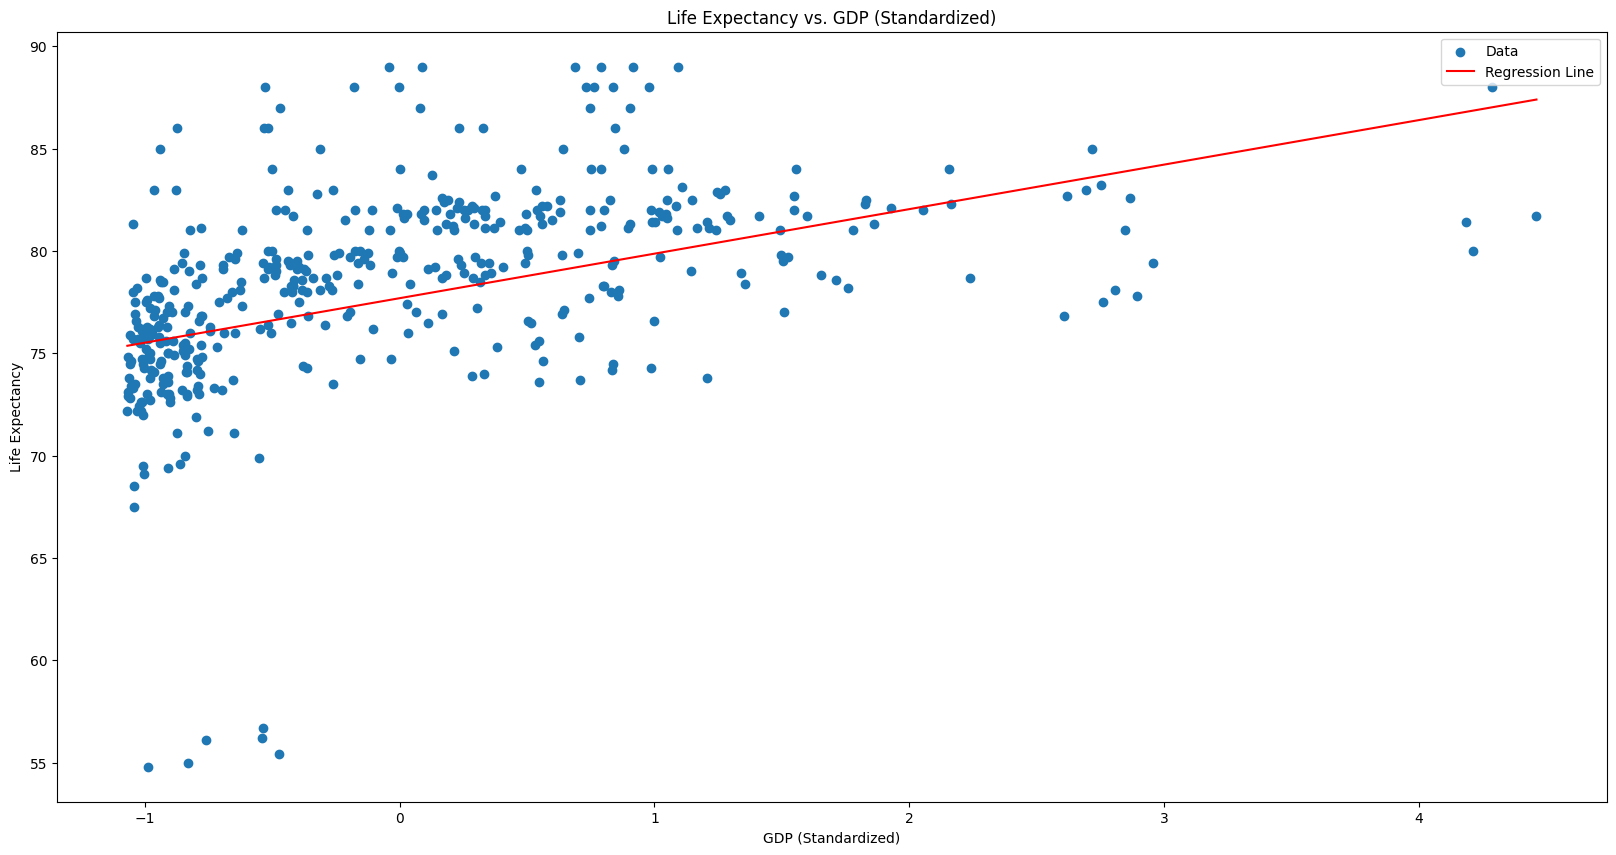

In [66]:
# Part2 Fitting a line (40 points):

# test the function with meaningful parameters to fit data from the WHOon how life expectancy may depend on GDP

# Colab 쓰면 아래 명령어 치면 받아짐
# !gdown 1ls8UVNIxToijFweUfhjkLsjS45z9-WP_

# Colab 안쓰면 아래 링크에서 받아서 쓰면됨
# download the data https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who 

# 제공 코드

# load the data
data = np.genfromtxt('content\Life Expectancy Data.csv', delimiter=',')
print(data.shape)
# life expectancy
Y = data[1:, 3]
# GDP
X = data[1:, 16]
# we will focus on higher-income countries only!
ind = X>10000
Y = Y[ind]
X = X[ind]

# Your code here

def gradient(X, Y, theta):
    m = len(Y)
    h = X @ theta
    return (1/m) * X.T @ (h - Y)

# Augment X with a column of ones for the bias term
X_augmented = np.column_stack((np.ones(X.shape[0]), X))

# Initial parameters
theta_initial = np.array([0, 0])

# Standardize the GDP values
X_mean = X.mean()
X_std = X.std()
X_standardized = (X - X_mean) / X_std

# Augment the standardized X values with a column of ones for the bias term
X_augmented = np.column_stack((np.ones(X_standardized.shape[0]), X_standardized))

# Run gradient descent with standardized features
theta_optimal = gradient_descent(gradient, X_augmented, Y, theta_initial, learning_rate=0.001, max_iter=4707, online_loss_plot=False)

# Sort X and Y for plotting
sorted_indices = np.argsort(X_standardized)
X_sorted = X_standardized[sorted_indices]
X_augmented_sorted = X_augmented[sorted_indices]
Y_sorted = Y[sorted_indices]

# Plotting the data and regression line
plt.figure(figsize=(20, 10))
plt.scatter(X_sorted, Y_sorted, label='Data')
plt.plot(X_sorted, X_augmented_sorted @ theta_optimal, color='red', label='Regression Line')
plt.xlabel('GDP (Standardized)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.title('Life Expectancy vs. GDP (Standardized)')
plt.show()


# 1. 데이터랑 결과값 선이랑 Loss 선 Plot으로 그리기 (x축 y축도 넣어야됨) - 그러기 위해선 Part 1을 잘 작성해야된대

# 2. learning_rate 조절하면서 실험해서 최소의 iteration으로 optimal이되는 learning_rate 및 최소 iteration 찾아서 쓰래 

# 3. 저거 데이터가 GDP 높은 나라들만 잰건데 낮은 GDP도 포함되면 어떻게 될지 디스커션해서 쓰래



(421, 17)


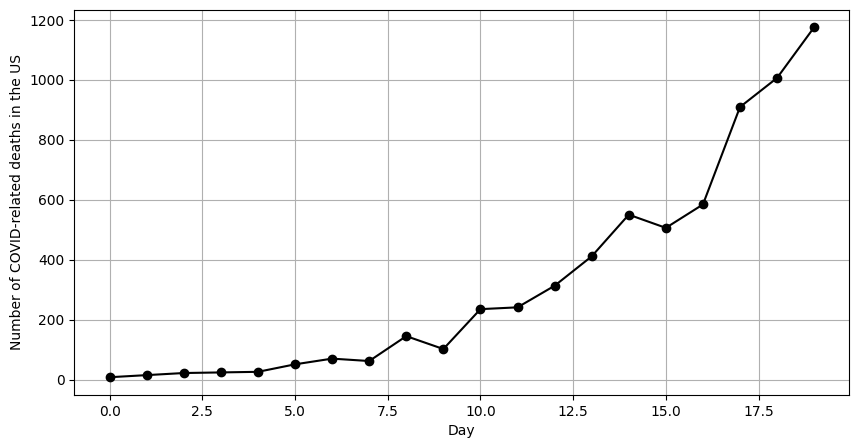

In [69]:
# Part3 Exponential optimization (40 points):

# load the data
response = requests.get('https://covidtracking.com/data/download/national-history.csv')
# not strictly necessary but good practice
response.raise_for_status()
# interpret results as BYTES, so that numpy can read from it!
data = np.genfromtxt(io.BytesIO(response.content),delimiter=',')
print(data.shape)

X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)
fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


# Your code here

# 1. 강의에서 쓴 역겨운 exponential을 log로 transform 해주기

# 2. 기존거랑 같은 결과 나오는지 loss plot을 통해 확인하기

# 3. log로 바꿔도 되는 이유 설명하기

(100, 2)


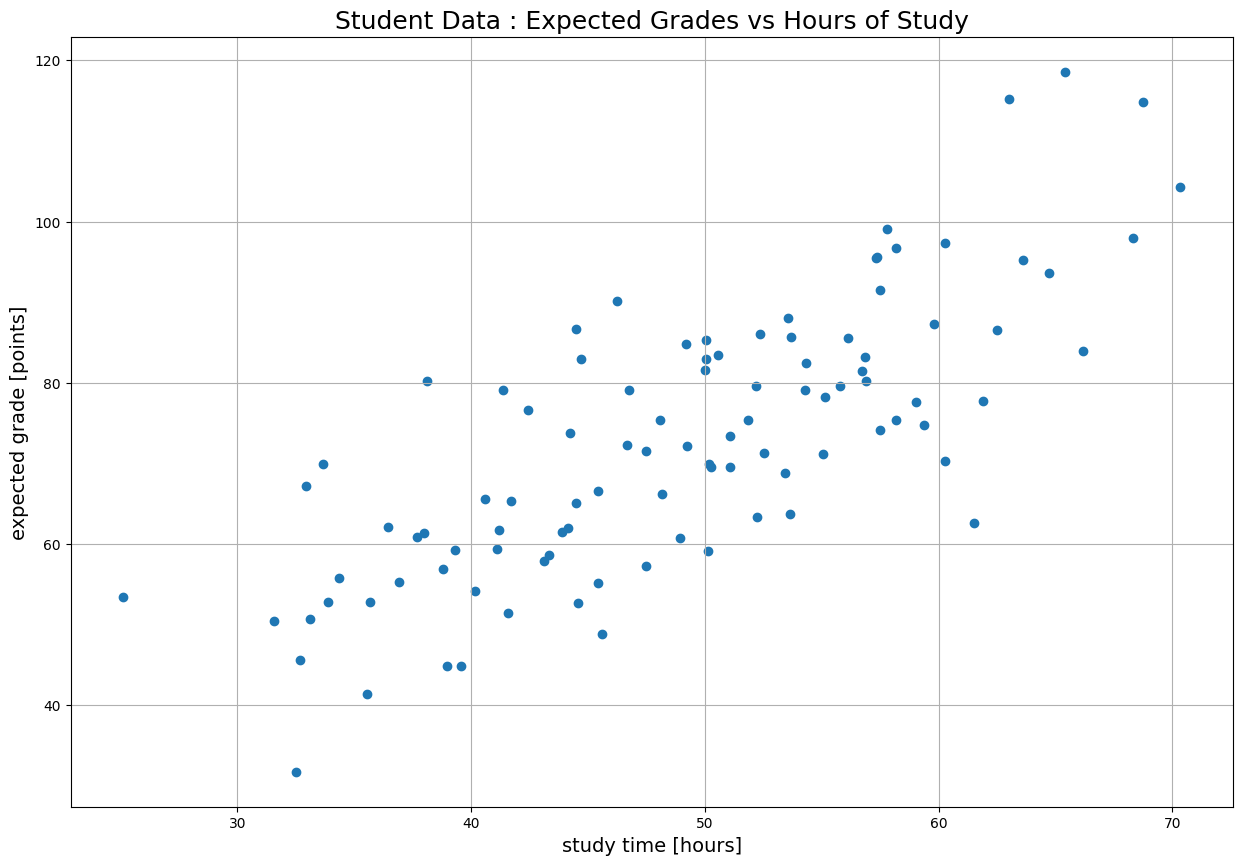

In [70]:
# Bonus: online loss function plot (20 points):

# load data
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
print(data.shape)
X = data[:, 0]
Y = data[:, 1]

fig = plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.title('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

# 위에 로드한 학생 데이터를 가지고 
# online_surf_plot = True 면 곡면이 나오게 하래
# 그 plot 위에 iteration 마다 점/선이 찍히게 하고
# wait-time 0.01s로 해야 렉 안걸린대
# 결과물은 과제 페이지 에 나온거랑 비슷하게 나오면 됨

# 이를 하기 위해선 충분히 큰 parameter space를 고려해야됨 (걍 눈에 보이는 그래프가 좋게 나오게 하면 됨)
# 의미있는 학생 데이터를 골라서 결과물에 추가하라고 함

# 아래 코드는 파라메터가 추가된 gradient_descent 함수임
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-06, online_loss_plot=False,online_surf_plot=False):

    # Your code here


    return theta
